# Plotting simulated topology weights in R

In [1]:
## set working directory 
setwd("/Users/sstankow/Documents/GitHub/Littorina_reproductive_mode/MSPrime_sims")
library("Ternary")
library("dplyr")
library("scales") 
library("DescTools")
library("moments")

ERROR: Error in setwd("/Users/sstankow/Documents/GitHub/Littorina_reproductive_mode/without_LGC2.1"): cannot change working directory


In [2]:
######### function for calculating D_lr and significance with G-test

Dlr <- function(df){
    df_counts <- df %>% mutate(side = case_when(
    topo1 > topo2 ~ 'right',
    topo1 < topo2 ~ 'left'))
    
    
    counts <- as.data.frame(table(df_counts$side)) 
    left <-counts[1,2] 
    right <-counts[2,2]

    total <- right + left
    D_lr <- (left-(0.5*total))/(0.5*total)
    
    observed <- c(left,right)
    expected <- c(0.5,0.5)
    
    G <- GTest(x=observed,
      p=expected, 
      correct="none")
    
    G_pvalue <- G[3]
    
    out <-c("dlr" = D_lr, "Gtest_p" = G_pvalue, "nleft" = left, "n_right" = right)
    
    return(out)
}

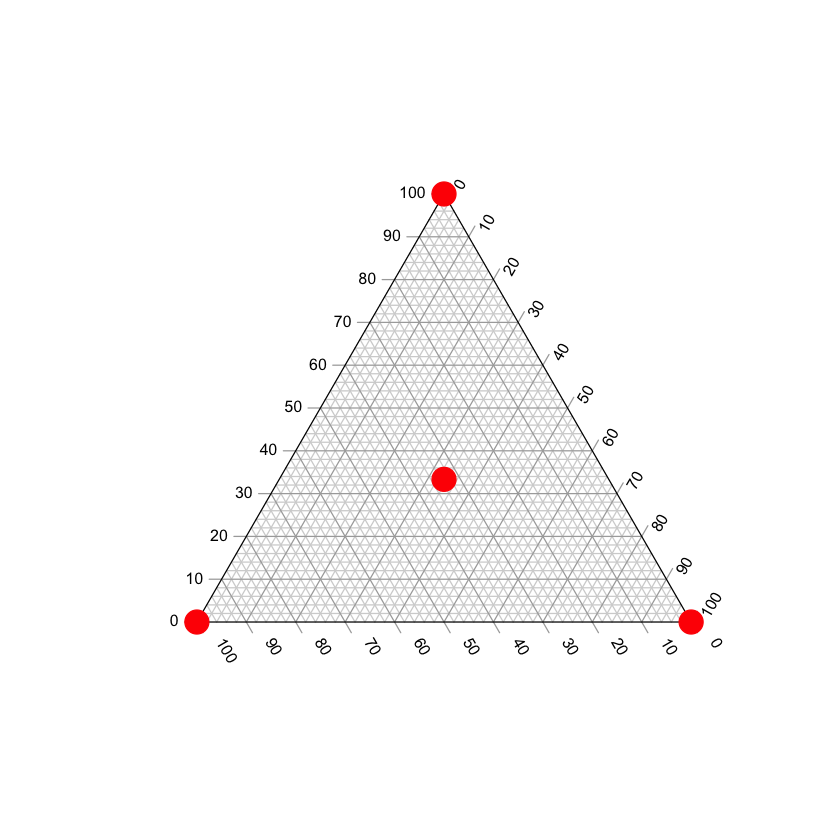

In [3]:
### test plot
TernaryPlot()
data_points <- list(
  A = c(1, 0, 0), 
  B = c(0, 1, 0),
  C = c(0, 0, 1),
  D = c(0.33, 0.33, 0.33))
AddToTernary(points, data_points, pch = 20, cex = 4, col="red")

In [4]:
########## plotting simulations with different split times

setwd("/Users/sstankow/Documents/GitHub/Littorina_reproductive_mode/MSPrime_sims")
library("Ternary")
library("dplyr")
library("scales") 

### Load all datasets
data_N0 <- read.csv('N0_output.weights.csv')
data_N1 <- read.csv('N1_output.weights.csv')
data_N2 <- read.csv('N2_output.weights.csv')
data_N2.5 <- read.csv('N2.5_output.weights.csv')
data_N3 <- read.csv('N3_output.weights.csv')
data_N3.5 <- read.csv('N3.5_output.weights.csv')
data_N4 <- read.csv('N4_output.weights.csv')
data_N4.5 <- read.csv('N4.5_output.weights.csv')
data_N5 <- read.csv('N5_output.weights.csv')
data_N6 <- read.csv('N6_output.weights.csv')
data_N7 <- read.csv('N7_output.weights.csv')
data_N8 <- read.csv('N8_output.weights.csv')

trans = 0.04
size = 5
label.size = 2

pdf("variableSplitTimes.pdf", width = 22, height = 30) 

par(mfrow=c(4,3),mar = c(0.3, 0.3, 0.3, 0.3))

data_sorted_N0 <- data_N0 %>% relocate(topo3)
TernaryPlot(main="T = 1, 2, 3", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N0, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_N1 <- data_N1 %>% relocate(topo3)
TernaryPlot(main="T = 10, 20, 30", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N1, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_N2 <- data_N2 %>% relocate(topo3)
TernaryPlot(main="T = 30, 60, 90", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N2, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_N2.5 <- data_N2.5 %>% relocate(topo3)
TernaryPlot(main="T = 45, 90, 135", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N2.5, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_N3 <- data_N3 %>% relocate(topo3)
TernaryPlot(main="T = 90, 180, 270", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N3, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_N3.5 <- data_N3.5 %>% relocate(topo3)
TernaryPlot(main="T = 135, 270, 405", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N3.5, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_N4 <- data_N4 %>% relocate(topo3)
TernaryPlot(main="T = 270, 540, 810", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N4, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_N4.5 <- data_N4.5 %>% relocate(topo3)
TernaryPlot(main="T = 405, 810, 1215", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N4.5, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_N5 <- data_N5 %>% relocate(topo3)
TernaryPlot(main="T = 810, 1620, 2430", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N5, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_N6 <- data_N6 %>% relocate(topo3)
TernaryPlot(main="T = 2430, 4860, 7290", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N6, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_N7 <- data_N7 %>% relocate(topo3)
TernaryPlot(main="T = 3645, 7290, 10935", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N7, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_N8 <- data_N8 %>% relocate(topo3)
TernaryPlot(main="T = 7290, 14580, 21870", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N8, pch = 20, cex = size,  col = alpha("blue", trans ))

dev.off() 

pdf 
  2

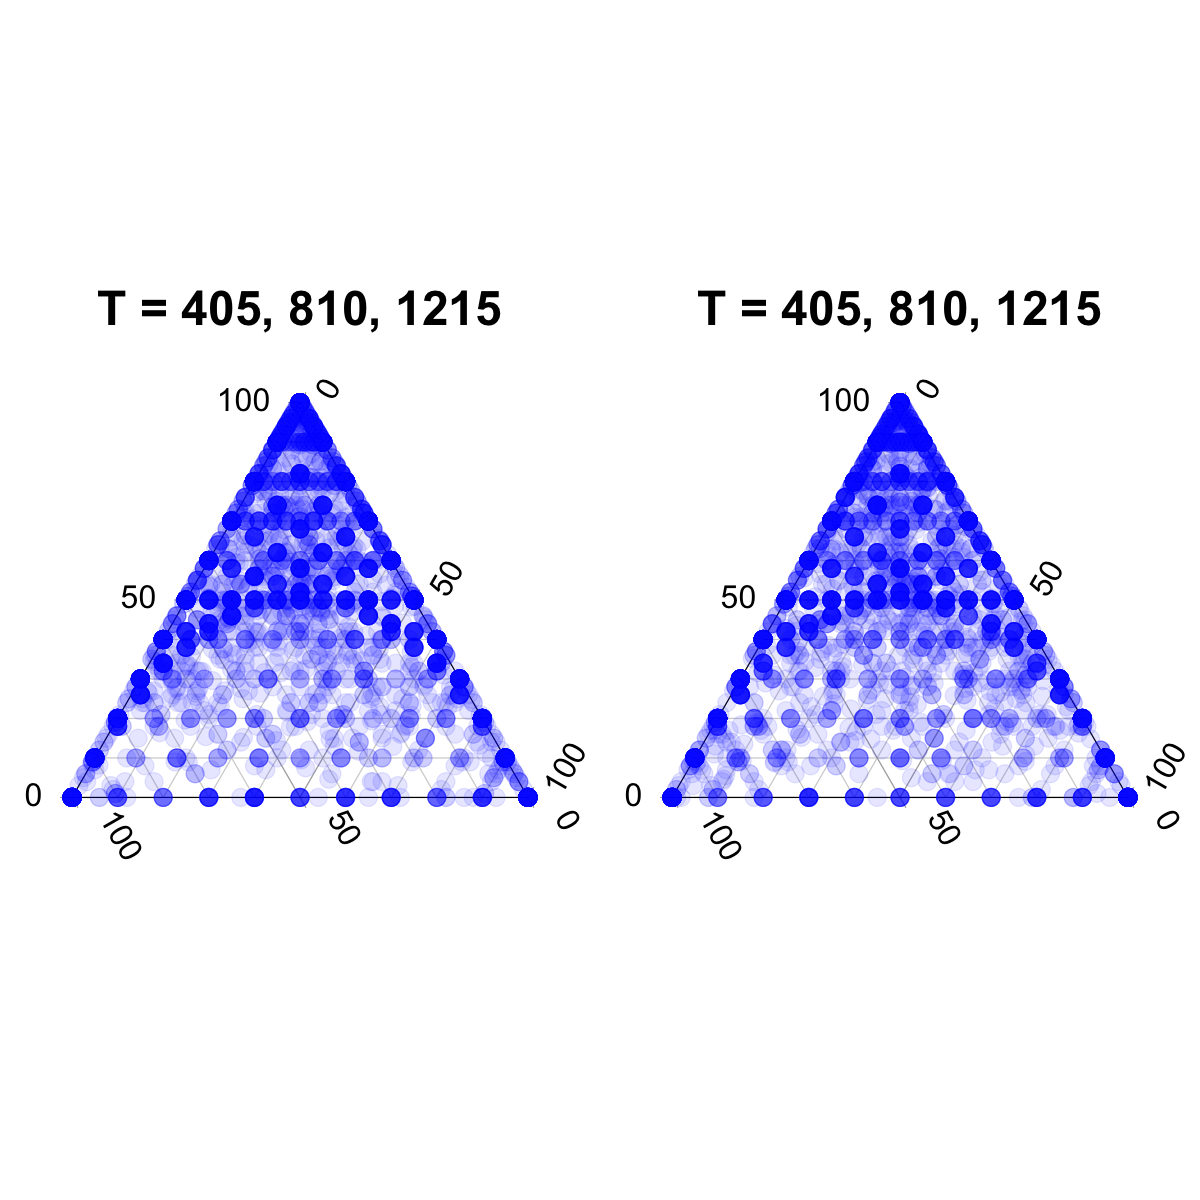

In [5]:
##effect of sample size on distribution of weights
library(repr)
options(repr.plot.width=10, repr.plot.height=10)

trans = 0.1

data_N4.5B <- read.csv('4.5_n40_output.weights.csv') ######## sim with 40 individuals per pop
data_N4.5 <- read.csv('N4.5_output.weights.csv') ########### sim with 20 populations per pop

par(mfrow=c(1,2),mar = c(0.3, 0.3, 0.3, 0.3))
data_N4.5B <- read.csv('4.5_n40_output.weights.csv')

data_sorted_N4.5 <- data_N4.5 %>% relocate(topo3)
TernaryPlot(main="T = 405, 810, 1215", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N4.5, pch = 20, cex = 3,  col = alpha("blue", trans ))

data_sorted_N4.5B <- data_N4.5B %>% relocate(topo3)
TernaryPlot(main="T = 405, 810, 1215", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N4.5B, pch = 20, cex = 3,  col = alpha("blue", trans ))


In [6]:
########## Plotting sims with uni-directional gene flow

setwd("/Users/sstankow/Documents/GitHub/Littorina_reproductive_mode/MSPrime_sims")
library("Ternary")
library("dplyr")
library("scales") 

##############

library(repr)
options(repr.plot.width=10, repr.plot.height=10)

data_N1 <- read.csv('N1_output.weights.csv')
data_G1 <- read.csv('G1.weights.csv')
data_G2 <- read.csv('G2.weights.csv')
data_G3 <- read.csv('G3.weights.csv')
#
data_N3 <- read.csv('N3_output.weights.csv')
data_G4 <- read.csv('G4.weights.csv')
data_G5 <- read.csv('G5.weights.csv')
data_G6 <- read.csv('G6.weights.csv')
#
data_N4.5 <- read.csv('N4.5_output.weights.csv')
data_G7 <- read.csv('G7.weights.csv')
data_G8 <- read.csv('G8.weights.csv')
data_G9 <- read.csv('G9.weights.csv')
#
data_N8 <- read.csv('N8_output.weights.csv')
data_G10 <- read.csv('G10.weights.csv')
data_G11 <- read.csv('G11.weights.csv')
data_G12 <- read.csv('G12.weights.csv')

size = 5
trans = 0.04

pdf("UniGeneFlow.pdf", width = 22, height = 30) 

par(mfrow=c(4,4),mar = c(0.3, 0.3, 0.3, 0.3))

data_sorted_N1 <- data_N1 %>% relocate(topo3)
TernaryPlot(main="T = 10, 20, 30; m = 0", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N1, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_G1 <- data_G1 %>% relocate(topo3)
TernaryPlot(main="m = 0.001", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_G1, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_G2 <- data_G2 %>% relocate(topo3)
TernaryPlot(main="m = 0.010", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_G2, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_G3 <- data_G3 %>% relocate(topo3)
TernaryPlot(main="m = 0.100", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_G3, pch = 20, cex = size,  col = alpha("blue", trans ))


###########

data_sorted_N3 <- data_N3 %>% relocate(topo3)
TernaryPlot(main="T = 90, 180, 270; m = 0", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N3, pch = 20, cex = size,  col = alpha("forestgreen", trans ))

data_sorted_G4 <- data_G4 %>% relocate(topo3)
TernaryPlot(main="m = 0.001", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_G4, pch = 20, cex = size,  col = alpha("forestgreen", trans ))

data_sorted_G5 <- data_G5 %>% relocate(topo3)
TernaryPlot(main="m = 0.010", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_G5, pch = 20, cex = size,  col = alpha("forestgreen", trans ))

data_sorted_G6 <- data_G6 %>% relocate(topo3)
TernaryPlot(main="m = 0.100", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_G6, pch = 20, cex = size,  col = alpha("forestgreen", trans ))


##########

data_sorted_N4.5 <- data_N4.5 %>% relocate(topo3)
TernaryPlot(main="T = 405, 810, 1215; m = 0", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N4.5, pch = 20, cex = size,  col = alpha("purple", trans ))

data_sorted_G7 <- data_G7 %>% relocate(topo3)
TernaryPlot(main="m = 0.001", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_G7, pch = 20, cex = size,  col = alpha("purple", trans ))

data_sorted_G8 <- data_G8 %>% relocate(topo3)
TernaryPlot(main="m = 0.010", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_G8, pch = 20, cex = size,  col = alpha("purple", trans ))

data_sorted_G9 <- data_G9 %>% relocate(topo3)
TernaryPlot(main="m = 0.100", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_G9, pch = 20, cex = size,  col = alpha("purple", trans ))


##########
data_sorted_N8 <- data_N8 %>% relocate(topo3)
TernaryPlot(main="T = 7290, 14580, 21870; m = 0", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N8, pch = 20, cex = 6,  col = alpha("darkorange", trans ))

data_sorted_G10 <- data_G10 %>% relocate(topo3)
TernaryPlot(main="m = 0.001", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_G10, pch = 20, cex = 6,  col = alpha("darkorange", 0.1 ))

data_sorted_G11 <- data_G11 %>% relocate(topo3)
TernaryPlot(main="m = 0.010", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_G11, pch = 20, cex = 6,  col = alpha("darkorange", trans ))

data_sorted_G12 <- data_G12 %>% relocate(topo3)
TernaryPlot(main="m = 0.100", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_G12, pch = 20, cex = 6,  col = alpha("darkorange", trans ))

dev.off() 

pdf 
  2

In [7]:
########## plotting sims with bi-directional gene floq 

setwd("/Users/sstankow/Documents/GitHub/Littorina_reproductive_mode/MSPrime_sims")
library("Ternary")
library("dplyr")
library("scales") 

#############

library(repr)
options(repr.plot.width=10, repr.plot.height=10)

data_N1 <- read.csv('N1_output.weights.csv')
dataB1 <- read.csv('B1.weights.csv')
dataB2 <- read.csv('B2.weights.csv')
dataB3 <- read.csv('B3.weights.csv')
#
data_N3 <- read.csv('N3_output.weights.csv')
dataB4 <- read.csv('B4.weights.csv')
dataB5 <- read.csv('B5.weights.csv')
dataB6 <- read.csv('B6.weights.csv')
#
data_N4.5 <- read.csv('N4.5_output.weights.csv')
dataB7 <- read.csv('B7.weights.csv')
dataB8 <- read.csv('B8.weights.csv')
dataB9 <- read.csv('B9.weights.csv')
#
data_N8 <- read.csv('N8_output.weights.csv')
dataB10 <- read.csv('B10.weights.csv')
dataB11 <- read.csv('B11.weights.csv')
dataB12 <- read.csv('B12.weights.csv')

size = 5
trans = 0.04

pdf("BiGeneFlow.pdf", width = 22, height = 30) 

par(mfrow=c(4,4),mar = c(0.3, 0.3, 0.3, 0.3))

data_sorted_N1 <- data_N1 %>% relocate(topo3)
TernaryPlot(main="T = 10, 20, 30; m = 0", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N1, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sortedB1 <- dataB1 %>% relocate(topo3)
TernaryPlot(main="m = 0.001", cex=2, grid.lines = 2)
AddToTernary(points, data_sortedB1, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sortedB2 <- dataB2 %>% relocate(topo3)
TernaryPlot(main="m = 0.010", cex=2, grid.lines = 2)
AddToTernary(points, data_sortedB2, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sortedB3 <- dataB3 %>% relocate(topo3)
TernaryPlot(main="m = 0.100", cex=2, grid.lines = 2)
AddToTernary(points, data_sortedB3, pch = 20, cex = size,  col = alpha("blue", trans ))


###########

data_sorted_N3 <- data_N3 %>% relocate(topo3)
TernaryPlot(main="T = 90, 180, 270; m = 0", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N3, pch = 20, cex = size,  col = alpha("forestgreen", trans ))

data_sortedB4 <- dataB4 %>% relocate(topo3)
TernaryPlot(main="m = 0.001", cex=2, grid.lines = 2)
AddToTernary(points, data_sortedB4, pch = 20, cex = size,  col = alpha("forestgreen", trans ))

data_sortedB5 <- dataB5 %>% relocate(topo3)
TernaryPlot(main="m = 0.010", cex=2, grid.lines = 2)
AddToTernary(points, data_sortedB5, pch = 20, cex = size,  col = alpha("forestgreen", trans ))

data_sortedB6 <- dataB6 %>% relocate(topo3)
TernaryPlot(main="m = 0.100", cex=2, grid.lines = 2)
AddToTernary(points, data_sortedB6, pch = 20, cex = size,  col = alpha("forestgreen", trans ))


##########

data_sorted_N4.5 <- data_N4.5 %>% relocate(topo3)
TernaryPlot(main="T = 405, 810, 1215; m = 0", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N4.5, pch = 20, cex = size,  col = alpha("purple", trans ))

data_sortedB7 <- dataB7 %>% relocate(topo3)
TernaryPlot(main="m = 0.001", cex=2, grid.lines = 2)
AddToTernary(points, data_sortedB7, pch = 20, cex = size,  col = alpha("purple", trans ))

data_sortedB8 <- dataB8 %>% relocate(topo3)
TernaryPlot(main="m = 0.010", cex=2, grid.lines = 2)
AddToTernary(points, data_sortedB8, pch = 20, cex = size,  col = alpha("purple", trans ))

data_sortedB9 <- dataB9 %>% relocate(topo3)
TernaryPlot(main="m = 0.100", cex=2, grid.lines = 2)
AddToTernary(points, data_sortedB9, pch = 20, cex = size,  col = alpha("purple", trans ))


##########
data_sorted_N8 <- data_N8 %>% relocate(topo3)
TernaryPlot(main="T = 7290, 14580, 21870; m = 0", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N8, pch = 20, cex = 6,  col = alpha("purple", trans ))

data_sortedB10 <- dataB10 %>% relocate(topo3)
TernaryPlot(main="m = 0.001", cex=2, grid.lines = 2)
AddToTernary(points, data_sortedB10, pch = 20, cex = 6,  col = alpha("darkorange", 0.1 ))

data_sortedB11 <- dataB11 %>% relocate(topo3)
TernaryPlot(main="m = 0.010", cex=2, grid.lines = 2)
AddToTernary(points, data_sortedB11, pch = 20, cex = 6,  col = alpha("darkorange", trans ))

data_sortedB12 <- dataB12 %>% relocate(topo3)
TernaryPlot(main="m = 0.100", cex=2, grid.lines = 2)
AddToTernary(points, data_sortedB12, pch = 20, cex = 6,  col = alpha("darkorange", trans ))

dev.off() 

pdf 
  2

In [8]:
############## plotting varying NEs

setwd("/Users/sstankow/Documents/GitHub/Littorina_reproductive_mode/MSPrime_sims")
library("Ternary")
library("dplyr")
library("scales") 

#############

library(repr)
options(repr.plot.width=10, repr.plot.height=10)

data_S0 <- read.csv('S0.weights.csv')
data_S1 <- read.csv('S1.weights.csv')
data_S2 <- read.csv('S2.weights.csv')
data_S3 <- read.csv('S3.weights.csv')
#
data_N3 <- read.csv('N3_output.weights.csv')
data_S4 <- read.csv('S4.weights.csv')
data_S5 <- read.csv('S5.weights.csv')
data_S6 <- read.csv('S6.weights.csv')
#
data_S7 <- read.csv('S7.weights.csv')
data_S8 <- read.csv('S8.weights.csv')
#

size = 5
trans = 0.04

pdf("varyingNE", width = 13, height = 30) 
par(mfrow=c(5,2),mar = c(1, 1, 1, 1))

data_sorted_S0 <- data_S0 %>% relocate(topo3)
TernaryPlot(main="Ne = 5", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_S0, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_S1 <- data_S1 %>% relocate(topo3)
TernaryPlot(main="Ne = 25", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_S1, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_S2 <- data_S2 %>% relocate(topo3)
TernaryPlot(main="Ne = 50", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_S2, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_S3 <- data_S3 %>% relocate(topo3)
TernaryPlot(main="Ne = 100", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_S3, pch = 20, cex = size,  col = alpha("blue", trans ))


###########

data_sorted_S4 <- data_S4 %>% relocate(topo3)
TernaryPlot(main="Ne = 250", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_S4, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_N3 <- data_N3 %>% relocate(topo3)
TernaryPlot(main="Ne = 500", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_N3, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_S5 <- data_S5 %>% relocate(topo3)
TernaryPlot(main="Ne = 750", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_S5, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_S6 <- data_S6 %>% relocate(topo3)
TernaryPlot(main="Ne =1250", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_S6, pch = 20, cex = size,  col = alpha("blue", trans ))


##########

data_sorted_S7 <- data_S7 %>% relocate(topo3)
TernaryPlot(main="Ne =2500", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_S7, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_S8 <- data_S8 %>% relocate(topo3)
TernaryPlot(main="Ne =5000", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_S8, pch = 20, cex = size,  col = alpha("blue", trans ))

dev.off() 

pdf 
  2

In [9]:
##### varing effective size in 1 population

setwd("/Users/sstankow/Documents/GitHub/Littorina_reproductive_mode/MSPrime_sims")
library("Ternary")
library("dplyr")
library("scales") 

library(repr)
options(repr.plot.width=10, repr.plot.height=10)

data_N1 <- read.csv('N1_output.weights.csv')
dataX1 <- read.csv('X1.weights.csv')
dataX2 <- read.csv('X2.weights.csv')
dataX3 <- read.csv('X3.weights.csv')
#
dataX4 <- read.csv('X4.weights.csv')
data_N3 <- read.csv('N3_output.weights.csv')
dataX5 <- read.csv('X5.weights.csv')
dataX6 <- read.csv('X6.weights.csv')
#
dataX7 <- read.csv('X7.weights.csv')
data_N4.5 <- read.csv('N4.5_output.weights.csv')
dataX8 <- read.csv('X8.weights.csv')
dataX9 <- read.csv('X9.weights.csv')
#
dataX10 <- read.csv('X10.weights.csv')
dataX11 <- read.csv('X11.weights.csv')
dataX12 <- read.csv('X12.weights.csv')
data_N8 <- read.csv('N8_output.weights.csv')

size = 5
trans = 0.04

pdf("1Ne_varying", width = 22, height = 30) 

par(mfrow=c(4,4),mar = c(0.3, 0.3, 0.3, 0.3))

data_sortedN1 <- data_N1 %>% relocate(topo3)
TernaryPlot(main="T = 10, 20, 30; P3 Ne = 500", cex=1.75, grid.lines = 2)
AddToTernary(points, data_sortedN1, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sortedX1 <- dataX1 %>% relocate(topo3)
TernaryPlot(main="P3 Ne = 250", cex=1.75, grid.lines = 2)
AddToTernary(points, data_sortedX1, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sortedX2 <- dataX2 %>% relocate(topo3)
TernaryPlot(main="P3 Ne = 50", cex=1.75, grid.lines = 2)
AddToTernary(points, data_sortedX2, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sortedX3 <- dataX3 %>% relocate(topo3)
TernaryPlot(main="P3 Ne = 5", cex=1.75, grid.lines = 2)
AddToTernary(points, data_sortedX3, pch = 20, cex = size,  col = alpha("blue", trans ))

###############


data_sortedX4 <- dataX4 %>% relocate(topo3)
TernaryPlot(main="T = 90, 180, 270; P3 Ne = 5000", cex=1.75, grid.lines = 2)
AddToTernary(points, data_sortedX4, pch = 20, cex = size,  col = alpha("forestgreen", trans ))

data_sortedN3 <- data_N3 %>% relocate(topo3)
TernaryPlot(main="P3 Ne = 500", cex=1.75, grid.lines = 2)
AddToTernary(points, data_sortedN3, pch = 20, cex = size,  col = alpha("forestgreen", trans ))

data_sortedX5 <- dataX5 %>% relocate(topo3)
TernaryPlot(main="P3 Ne = 250", cex=1.75, grid.lines = 2)
AddToTernary(points, data_sortedX5, pch = 20, cex = size,  col = alpha("forestgreen", trans ))

data_sortedX6 <- dataX6 %>% relocate(topo3)
TernaryPlot(main="m = 5", cex=1.75, grid.lines = 2)
AddToTernary(points, data_sortedX6, pch = 20, cex = size,  col = alpha("forestgreen", trans ))


###############

data_sortedX7 <- dataX7 %>% relocate(topo3)
TernaryPlot(main="T = 405, 810, 1215; P3 Ne = 5000", cex=1.75, grid.lines = 2)
AddToTernary(points, data_sortedX7, pch = 20, cex = size,  col = alpha("purple", trans ))

data_sortedN4.5 <- data_N4.5 %>% relocate(topo3)
TernaryPlot(main="P3 Ne = 500", cex=1.75, grid.lines = 2)
AddToTernary(points, data_sortedN4.5, pch = 20, cex = size,  col = alpha("purple", trans ))

data_sortedX8 <- dataX8 %>% relocate(topo3)
TernaryPlot(main="P3 Ne = 250", cex=1.75, grid.lines = 2)
AddToTernary(points, data_sortedX8, pch = 20, cex = size,  col = alpha("purple", trans ))

data_sortedX9 <- dataX9 %>% relocate(topo3)
TernaryPlot(main="P3 Ne = 5", cex=1.75, grid.lines = 2)
AddToTernary(points, data_sortedX9, pch = 20, cex = size,  col = alpha("purple", trans ))

###############

data_sortedX10 <- dataX10 %>% relocate(topo3)
TernaryPlot(main="T = 7290, 14580, 21870; P3 Ne = 5000", cex=1.55, grid.lines = 2)
AddToTernary(points, data_sortedX10, pch = 20, cex = size,  col = alpha("darkorange", trans ))

data_sortedX11 <- dataX11 %>% relocate(topo3)
TernaryPlot(main="P3 Ne = 3000", cex=1.75, grid.lines = 2)
AddToTernary(points, data_sortedX11, pch = 20, cex = size,  col = alpha("darkorange", trans ))

data_sortedX12 <- dataX12 %>% relocate(topo3)
TernaryPlot(main="P3 Ne = 1500", cex=1.75, grid.lines = 2)
AddToTernary(points, data_sortedX12, pch = 20, cex = size,  col = alpha("darkorange", trans ))

data_sortedN8 <- data_N8 %>% relocate(topo3)
TernaryPlot(main="P3 Ne = 500", cex=1.75, grid.lines = 2)
AddToTernary(points, data_sortedN8, pch = 20, cex = size,  col = alpha("darkorange", trans ))

dev.off()

pdf 
  2

In [10]:
##### varing split times, but with 5 k generations after all splits

setwd("/Users/sstankow/Documents/GitHub/Littorina_reproductive_mode/MSPrime_sims")
library("Ternary")
library("dplyr")
library("scales") 

#############

library(repr)
options(repr.plot.width=10, repr.plot.height=10)

data_Y0 <- read.csv('Y0.weights.csv')
data_Y1 <- read.csv('Y1.weights.csv')
data_Y2 <- read.csv('Y2.weights.csv')
data_Y3 <- read.csv('Y3.weights.csv')
data_Y4 <- read.csv('Y4.weights.csv')
data_Y5 <- read.csv('Y5.weights.csv')
data_Y6 <- read.csv('Y6.weights.csv')
data_Y7 <- read.csv('Y7.weights.csv')

#############

size = 5
trans = 0.04

pdf("splitsWithLongFinish", width = 22, height = 30) 

par(mfrow=c(4,4),mar = c(0.3, 0.3, 0.3, 0.3))


data_sorted_Y0 <- data_Y0 %>% relocate(topo3)
TernaryPlot(main="T = 5000,5100,5100", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_Y0, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_Y1 <- data_Y1 %>% relocate(topo3)
TernaryPlot(main="T = 5000,5050,5200", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_Y1, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_Y2 <- data_Y2 %>% relocate(topo3)
TernaryPlot(main="T = 5000,5250,5500", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_Y2, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_Y3 <- data_Y3 %>% relocate(topo3)
TernaryPlot(main="T = 5000,5500,6000", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_Y3, pch = 20, cex = size,  col = alpha("blue", trans ))


countsY0 <- c(sum(data_sorted_Y0$topo3==10000),sum(data_sorted_Y0$topo1==10000),sum(data_sorted_Y0$topo2==10000))
pie(countsY0, labels=c("Ta","Tb","Tc"), cex=3, col=c("white","gray","black"))
countsY1 <- c(sum(data_sorted_Y1$topo3==10000),sum(data_sorted_Y1$topo1==10000),sum(data_sorted_Y1$topo2==10000))
pie(countsY1, labels=c("Ta","Tb","Tc"), cex=3, col=c("white","gray","black"))
countsY2 <- c(sum(data_sorted_Y2$topo3==10000),sum(data_sorted_Y2$topo1==10000),sum(data_sorted_Y2$topo2==10000))
pie(countsY2, labels=c("Ta","Tb","Tc"), cex=3, col=c("white","gray","black"))
countsY3 <- c(sum(data_sorted_Y3$topo3==10000),sum(data_sorted_Y3$topo1==10000),sum(data_sorted_Y3$topo2==10000))
pie(countsY3, labels=c("Ta","Tb","Tc"), cex=3, col=c("white","gray","black"))

data_sorted_Y4 <- data_Y4 %>% relocate(topo3)
TernaryPlot(main="T = 5000,6000,7000", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_Y4, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_Y5 <- data_Y5 %>% relocate(topo3)
TernaryPlot(main="T = 5000,7000,9000", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_Y5, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_Y6 <- data_Y6 %>% relocate(topo3)
TernaryPlot(main="T = 5000,9000,13000", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_Y6, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_Y7 <- data_Y7 %>% relocate(topo3)
TernaryPlot(main="T = 5000,12000,21000", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_Y7, pch = 20, cex = size,  col = alpha("blue", trans ))


countsY4 <- c(sum(data_sorted_Y4$topo3==10000),sum(data_sorted_Y4$topo1==10000),sum(data_sorted_Y4$topo2==10000))
pie(countsY4, labels=c("Ta","Tb","Tc"), cex=3, col=c("white","gray","black"))
countsY5 <- c(sum(data_sorted_Y5$topo3==10000),sum(data_sorted_Y5$topo1==10000),sum(data_sorted_Y5$topo2==10000))
pie(countsY5, labels=c("Ta","Tb","Tc"), cex=3, col=c("white","gray","black"))
countsY6 <- c(sum(data_sorted_Y6$topo3==10000),sum(data_sorted_Y6$topo1==10000),sum(data_sorted_Y6$topo2==10000))
pie(countsY6, labels=c("Ta","Tb","Tc"), cex=3, col=c("white","gray","black"))
countsY7 <- c(sum(data_sorted_Y7$topo3==10000),sum(data_sorted_Y7$topo1==10000),sum(data_sorted_Y7$topo2==10000))
pie(countsY7, labels=c("Ta","Tb","Tc"), cex=3, col=c("white","gray","black"))


dev.off()


pdf 
  2

In [11]:
############## Uneven split times

setwd("/Users/sstankow/Documents/GitHub/Littorina_reproductive_mode/MSPrime_sims")
library("Ternary")
library("dplyr")
library("scales") 

#############

library(repr)
options(repr.plot.width=10, repr.plot.height=10)

data_U0 <- read.csv('U0.weights.csv')
data_U1 <- read.csv('U1.weights.csv')
data_U2 <- read.csv('U2.weights.csv')
data_U3 <- read.csv('U3.weights.csv')
data_U4 <- read.csv('U4.weights.csv')
data_U5 <- read.csv('U5.weights.csv')
data_U6 <- read.csv('U6.weights.csv')
data_U7 <- read.csv('U7.weights.csv')
data_U8 <- read.csv('U8.weights.csv')
data_U9 <- read.csv('U9.weights.csv')

#

size = 5
trans = 0.04

pdf("unevenSplits", width = 13, height = 30) 
par(mfrow=c(5,2),mar = c(1, 1, 1, 1))

######

data_sorted_U0 <- data_U0 %>% relocate(topo3) ## 1
TernaryPlot(main="T = 90, 260, 270", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_U0, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_U9 <- data_U9 %>% relocate(topo3)
TernaryPlot(main="T = 405, 1080, 1215", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_U9, pch = 20, cex = size,  col = alpha("forestgreen", trans ))

data_sorted_U1 <- data_U1 %>% relocate(topo3) ## 3
TernaryPlot(main="T = 90, 230, 270", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_U1, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_U8 <- data_U8 %>% relocate(topo3)
TernaryPlot(main="T = 405, 945, 1215", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_U8, pch = 20, cex = size,  col = alpha("forestgreen", trans ))

data_sorted_U2 <- data_U2 %>% relocate(topo3) ## 5
TernaryPlot(main="T = 90, 180, 270", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_U2, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_U7 <- data_U7 %>% relocate(topo3)
TernaryPlot(main="T = 405, 810, 1215", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_U7, pch = 20, cex = size,  col = alpha("forestgreen", trans ))

data_sorted_U3 <- data_U3 %>% relocate(topo3) ## 7 
TernaryPlot(main="T = 90, 130, 270", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_U3, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_U6 <- data_U6 %>% relocate(topo3)
TernaryPlot(main="T = 405, 675, 1215", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_U6, pch = 20, cex = size,  col = alpha("forestgreen", trans ))

data_sorted_U4 <- data_U4 %>% relocate(topo3) ## 9 
TernaryPlot(main="T = 90, 100, 270", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_U4, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_U5 <- data_U5 %>% relocate(topo3)
TernaryPlot(main="T = 405, 540, 1215", cex=2, grid.lines = 2)
AddToTernary(points, data_sorted_U5, pch = 20, cex = size,  col = alpha("forestgreen", trans ))

dev.off()

pdf 
  2

In [12]:
############## gene flow for 10% of the genome

setwd("/Users/sstankow/Documents/GitHub/Littorina_reproductive_mode/MSPrime_sims")
library("Ternary")
library("dplyr")
library("scales") 

#############

library(repr)
options(repr.plot.width=10, repr.plot.height=10)

data_Ifull <- read.csv('Ifull.weights.csv')
data_IfullB <- read.csv('IfullB.weights.csv')
data_I1 <- read.csv('I1.weights.csv')
data_I2 <- read.csv('I2.weights.csv')
data_I3 <- read.csv('I3.weights.csv')
data_I4 <- read.csv('I4.weights.csv')
data_I5 <- read.csv('I5.weights.csv')
data_I6 <- read.csv('I6.weights.csv')
data_I7 <- read.csv('I7.weights.csv')
data_I8 <- read.csv('I8.weights.csv')
data_I9 <- read.csv('I9.weights.csv')
data_I10 <- read.csv('I10.weights.csv')
data_I11 <- read.csv('I11.weights.csv')
data_I12 <- read.csv('I12.weights.csv')

size = 5
trans = 0.04

pdf("10percUniGF", width = 13, height = 30) 
par(mfrow=c(6,2),mar = c(1, 1, 1, 1))

data_sorted_Ifull <- data_Ifull %>% relocate(topo3) ## 1
data_sorted_IfullB <- data_IfullB %>% relocate(topo3) ## 1
data_sorted_I1 <- data_I1 %>% relocate(topo3) 
TernaryPlot(main="T = 100, 200, 300; m = 0.001", cex=1.65, grid.lines = 2) 
AddToTernary(points, data_sorted_Ifull, pch = 20, cex = size,  col = alpha("gray65", trans ))
AddToTernary(points, data_sorted_I1, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_I7 <- data_I7 %>% relocate(topo3) 
TernaryPlot(main="T = 405, 945, 1215; m = 0.001", cex=1.65, grid.lines = 2)
AddToTernary(points, data_sorted_IfullB, pch = 20, cex = size,  col = alpha("gray65", trans ))
AddToTernary(points, data_sorted_I7, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_I2 <- data_I2 %>% relocate(topo3) ## 3
TernaryPlot(main="T = 100, 200, 300; m = 0.005", cex=1.65, grid.lines = 2)
AddToTernary(points, data_sorted_Ifull, pch = 20, cex = size,  col = alpha("gray65", trans ))
AddToTernary(points, data_sorted_I2, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_I8 <- data_I8 %>% relocate(topo3) 
TernaryPlot(main="T = 405, 945, 1215; m = 0.005", cex=1.65, grid.lines = 2)
AddToTernary(points, data_sorted_IfullB, pch = 20, cex = size,  col = alpha("gray65", trans ))
AddToTernary(points, data_sorted_I8, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_I3 <- data_I3 %>% relocate(topo3) ## 5
TernaryPlot(main="T = 100, 200, 300; m = 0.010", cex=1.65, grid.lines = 2) 
AddToTernary(points, data_sorted_Ifull, pch = 20, cex = size,  col = alpha("gray65", trans ))
AddToTernary(points, data_sorted_I3, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_I9 <- data_I9 %>% relocate(topo3) 
TernaryPlot(main="T = 405, 945, 1215; m = 0.010", cex=1.65, grid.lines = 2)
AddToTernary(points, data_sorted_IfullB, pch = 20, cex = size,  col = alpha("gray65", trans ))
AddToTernary(points, data_sorted_I9, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_I4 <- data_I4 %>% relocate(topo3) ## 7
TernaryPlot(main="T = 100, 200, 300; m = 0.050", cex=1.65, grid.lines = 2) 
AddToTernary(points, data_sorted_Ifull, pch = 20, cex = size,  col = alpha("gray65", trans ))
AddToTernary(points, data_sorted_I4, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_I10 <- data_I10 %>% relocate(topo3) 
TernaryPlot(main="T = 405, 945, 1215; m = 0.050", cex=1.65, grid.lines = 2)
AddToTernary(points, data_sorted_IfullB, pch = 20, cex = size,  col = alpha("gray65", trans ))
AddToTernary(points, data_sorted_I10, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_I5 <- data_I5 %>% relocate(topo3)  ## 9
TernaryPlot(main="T = 100, 200, 300; m = 0.100", cex=1.65, grid.lines = 2)
AddToTernary(points, data_sorted_Ifull, pch = 20, cex = size,  col = alpha("gray65", trans ))
AddToTernary(points, data_sorted_I5, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_I11 <- data_I11 %>% relocate(topo3) 
TernaryPlot(main="T = 405, 945, 1215; m = 0.100", cex=1.65, grid.lines = 2)
AddToTernary(points, data_sorted_IfullB, pch = 20, cex = size,  col = alpha("gray65", trans ))
AddToTernary(points, data_sorted_I11, pch = 20, cex = size,  col = alpha("blue", trans ))

data_sorted_I6 <- data_I6 %>% relocate(topo3) ## 11
TernaryPlot(main="T = 100, 200, 300; m = 0.500", cex=1.65, grid.lines = 2)
AddToTernary(points, data_sorted_Ifull, pch = 20, cex = size,  col = alpha("gray65", trans ))
AddToTernary(points, data_sorted_I6, pch = 20, cex = size,  col = alpha("blue", trans ))
             
data_sorted_I12 <- data_I12 %>% relocate(topo3) 
TernaryPlot(main="T = 405, 945, 1215; m = 0.500", cex=1.65, grid.lines = 2)
AddToTernary(points, data_sorted_IfullB, pch = 20, cex = size,  col = alpha("gray65", trans ))
AddToTernary(points, data_sorted_I12, pch = 20, cex = size,  col = alpha("blue", trans ))
             
##########################
             
dev.off()

pdf 
  2

In [13]:
## ancestral structure

setwd("/Users/sstankow/Documents/GitHub/Littorina_reproductive_mode/MSPrime_sims")
library("Ternary")
library("dplyr")
library("scales") 

#############

library(repr)
options(repr.plot.width=10, repr.plot.height=10)

data_Ifull <- read.csv('Ifull.weights.csv')
data_IfullB <- read.csv('IfullB.weights.csv')
data_A1 <- read.csv('A1.weights.csv')
data_A2 <- read.csv('A2.weights.csv')
data_A3 <- read.csv('A3.weights.csv')
data_A4 <- read.csv('A4.weights.csv')
data_A5 <- read.csv('A5.weights.csv')
data_A6 <- read.csv('A6.weights.csv')
data_A7 <- read.csv('A7.weights.csv')
data_A8 <- read.csv('A8.weights.csv')


size = 5
trans = 0.04

pdf("AncestralStructure", width = 13, height = 30) 
par(mfrow=c(4,2),mar = c(1, 1, 1, 1))

data_sorted_Ifull <- data_Ifull %>% relocate(topo3) ## 
data_sorted_IfullB <- data_IfullB %>% relocate(topo3) ## 

data_sorted_A1 <- data_A1 %>% relocate(topo1) 
TernaryPlot(main="T = 100, 200, 300; Ta = 220", cex=1.65, grid.lines = 2) 
AddToTernary(points, data_sorted_Ifull, pch = 20, cex = size,  col = alpha("grey", trans ))
AddToTernary(points, data_sorted_A1, pch = 20, cex = size,  col = alpha("red", trans ))

data_sorted_Ifull <- data_Ifull %>% relocate(topo3) ## 
data_sorted_A5 <- data_A5 %>% relocate(topo1) 
TernaryPlot(main="T = 405, 945, 1215; Ta = 1005", cex=1.65, grid.lines = 2) 
AddToTernary(points, data_sorted_IfullB, pch = 20, cex = size,  col = alpha("grey", trans ))
AddToTernary(points, data_sorted_A5, pch = 20, cex = size,  col = alpha("red", trans ))

data_sorted_Ifull <- data_Ifull %>% relocate(topo3) ## 
data_sorted_A2 <- data_A2 %>% relocate(topo1) 
TernaryPlot(main="Ta = 240", cex=1.65, grid.lines = 2) 
AddToTernary(points, data_sorted_Ifull, pch = 20, cex = size,  col = alpha("grey", trans ))
AddToTernary(points, data_sorted_A2, pch = 20, cex = size,  col = alpha("red", trans ))

data_sorted_Ifull <- data_Ifull %>% relocate(topo3) ## 
data_sorted_A6 <- data_A6 %>% relocate(topo1) 
TernaryPlot(main="Ta = 1065", cex=1.65, grid.lines = 2) 
AddToTernary(points, data_sorted_IfullB, pch = 20, cex = size,  col = alpha("grey", trans ))
AddToTernary(points, data_sorted_A6, pch = 20, cex = size,  col = alpha("red", trans ))

data_sorted_Ifull <- data_Ifull %>% relocate(topo3) ## 
data_sorted_A3 <- data_A3 %>% relocate(topo1) 
TernaryPlot(main="Ta = 260", cex=1.65, grid.lines = 2) 
AddToTernary(points, data_sorted_Ifull, pch = 20, cex = size,  col = alpha("grey", trans ))
AddToTernary(points, data_sorted_A3, pch = 20, cex = size,  col = alpha("red", trans ))

data_sorted_Ifull <- data_Ifull %>% relocate(topo3) ## 
data_sorted_A7 <- data_A7 %>% relocate(topo1) 
TernaryPlot(main="Ta = 1125", cex=1.65, grid.lines = 2) 
AddToTernary(points, data_sorted_IfullB, pch = 20, cex = size,  col = alpha("grey", trans ))
AddToTernary(points, data_sorted_A7, pch = 20, cex = size,  col = alpha("red", trans ))

data_sorted_Ifull <- data_Ifull %>% relocate(topo3) ## 
data_sorted_A4 <- data_A4 %>% relocate(topo1) 
TernaryPlot(main="Ta = 280", cex=1.65, grid.lines = 2) 
AddToTernary(points, data_sorted_Ifull, pch = 20, cex = size,  col = alpha("grey", trans ))
AddToTernary(points, data_sorted_A4, pch = 20, cex = size,  col = alpha("red", trans ))

data_sorted_Ifull <- data_Ifull %>% relocate(topo3) ## 
data_sorted_A8 <- data_A8 %>% relocate(topo1) 
TernaryPlot(main="Ta = 1185", cex=1.65, grid.lines = 2) 
AddToTernary(points, data_sorted_IfullB, pch = 20, cex = size,  col = alpha("grey", trans ))
AddToTernary(points, data_sorted_A8, pch = 20, cex = size,  col = alpha("red", trans ))


dev.off()

pdf 
  2

In [14]:

######### function for calculating D_lr and significance with G-test

Dlr <- function(df){
    df_counts <- df %>% mutate(side = case_when(
    topo1 > topo2 ~ 'right',
    topo1 < topo2 ~ 'left'))
    
    
    counts <- as.data.frame(table(df_counts$side)) 
    left <-counts[1,2] 
    right <-counts[2,2]

    total <- right + left
    D_lr <- (left-(0.5*total))/(0.5*total)
    
    observed <- c(left,right)
    expected <- c(0.5,0.5)
    
    G <- GTest(x=observed,
      p=expected, 
      correct="none")
    
    G_pvalue <- G[3]
    
    out <-c("dlr" = D_lr, "Gtest_p" = G_pvalue, "nleft" = left, "n_right" = right)
    
    return(out)
}
    

In [15]:

####### These needs to be concatentaed so that the counts from the backround and alternative sims are combined together
#### gene flow A
data_Ifull <- read.csv('Ifull.weights.csv')
data_I1 <- read.csv('I1.weights.csv')
data_I2 <- read.csv('I2.weights.csv')
data_I3 <- read.csv('I3.weights.csv')
data_I4 <- read.csv('I4.weights.csv')
data_I5 <- read.csv('I5.weights.csv')
data_I6 <- read.csv('I6.weights.csv')
#### gene flow B
data_IfullB <- read.csv('IfullB.weights.csv')
data_I7 <- read.csv('I7.weights.csv')
data_I8 <- read.csv('I8.weights.csv')
data_I9 <- read.csv('I9.weights.csv')
data_I10 <- read.csv('I10.weights.csv')
data_I11 <- read.csv('I11.weights.csv')
data_I12 <- read.csv('I12.weights.csv')

I1_combined <- rbind(data_Ifull, data_I1)
I2_combined <- rbind(data_Ifull, data_I2)
I3_combined <- rbind(data_Ifull, data_I3)
I4_combined <- rbind(data_Ifull, data_I4)
I5_combined <- rbind(data_Ifull, data_I5)
I6_combined <- rbind(data_Ifull, data_I6)
I7_combined <- rbind(data_IfullB, data_I7)
I8_combined <- rbind(data_IfullB, data_I8)
I9_combined <- rbind(data_IfullB, data_I9)
I10_combined <- rbind(data_IfullB, data_I10)
I11_combined <- rbind(data_IfullB, data_I11)
I12_combined <- rbind(data_IfullB, data_I12)


############################################################ All datasets

data_N0 <- read.csv('N0_output.weights.csv')
data_N1 <- read.csv('N1_output.weights.csv')
data_N2 <- read.csv('N2_output.weights.csv')
data_N2.5 <- read.csv('N2.5_output.weights.csv')
data_N3 <- read.csv('N3_output.weights.csv')
data_N3.5 <- read.csv('N3.5_output.weights.csv')
data_N4 <- read.csv('N4_output.weights.csv')
data_N4.5 <- read.csv('N4.5_output.weights.csv')
data_N5 <- read.csv('N5_output.weights.csv')
data_N6 <- read.csv('N6_output.weights.csv')
data_N7 <- read.csv('N7_output.weights.csv')
data_N8 <- read.csv('N8_output.weights.csv')
data_N1 <- read.csv('N1_output.weights.csv')
data_G1 <- read.csv('G1.weights.csv')
data_G2 <- read.csv('G2.weights.csv')
data_G3 <- read.csv('G3.weights.csv')
data_N3 <- read.csv('N3_output.weights.csv')
data_G4 <- read.csv('G4.weights.csv')
data_G5 <- read.csv('G5.weights.csv')
data_G6 <- read.csv('G6.weights.csv')
data_N4.5 <- read.csv('N4.5_output.weights.csv')
data_G7 <- read.csv('G7.weights.csv')
data_G8 <- read.csv('G8.weights.csv')
data_G9 <- read.csv('G9.weights.csv')
data_N8 <- read.csv('N8_output.weights.csv')
data_G10 <- read.csv('G10.weights.csv')
data_G11 <- read.csv('G11.weights.csv')
data_G12 <- read.csv('G12.weights.csv')
data_N1 <- read.csv('N1_output.weights.csv')
dataB1 <- read.csv('B1.weights.csv')
dataB2 <- read.csv('B2.weights.csv')
dataB3 <- read.csv('B3.weights.csv')
data_N3 <- read.csv('N3_output.weights.csv')
dataB4 <- read.csv('B4.weights.csv')
dataB5 <- read.csv('B5.weights.csv')
dataB6 <- read.csv('B6.weights.csv')
data_N4.5 <- read.csv('N4.5_output.weights.csv')
dataB7 <- read.csv('B7.weights.csv')
dataB8 <- read.csv('B8.weights.csv')
dataB9 <- read.csv('B9.weights.csv')
data_N8 <- read.csv('N8_output.weights.csv')
dataB10 <- read.csv('B10.weights.csv')
dataB11 <- read.csv('B11.weights.csv')
dataB12 <- read.csv('B12.weights.csv')
data_S0 <- read.csv('S0.weights.csv')
data_S1 <- read.csv('S1.weights.csv')
data_S2 <- read.csv('S2.weights.csv')
data_S3 <- read.csv('S3.weights.csv')
data_N3 <- read.csv('N3_output.weights.csv')
data_S4 <- read.csv('S4.weights.csv')
data_S5 <- read.csv('S5.weights.csv')
data_S6 <- read.csv('S6.weights.csv')
data_S7 <- read.csv('S7.weights.csv')
data_S8 <- read.csv('S8.weights.csv')
data_N1 <- read.csv('N1_output.weights.csv')
dataX1 <- read.csv('X1.weights.csv')
dataX2 <- read.csv('X2.weights.csv')
dataX3 <- read.csv('X3.weights.csv')
dataX4 <- read.csv('X4.weights.csv')
data_N3 <- read.csv('N3_output.weights.csv')
dataX5 <- read.csv('X5.weights.csv')
dataX6 <- read.csv('X6.weights.csv')
dataX7 <- read.csv('X7.weights.csv')
data_N4.5 <- read.csv('N4.5_output.weights.csv')
dataX8 <- read.csv('X8.weights.csv')
dataX9 <- read.csv('X9.weights.csv')
dataX10 <- read.csv('X10.weights.csv')
dataX11 <- read.csv('X11.weights.csv')
dataX12 <- read.csv('X12.weights.csv')
data_N8 <- read.csv('N8_output.weights.csv')
data_Y0 <- read.csv('Y0.weights.csv')
data_Y1 <- read.csv('Y1.weights.csv')
data_Y2 <- read.csv('Y2.weights.csv')
data_Y3 <- read.csv('Y3.weights.csv')
data_Y4 <- read.csv('Y4.weights.csv')
data_Y5 <- read.csv('Y5.weights.csv')
data_Y6 <- read.csv('Y6.weights.csv')
data_Y7 <- read.csv('Y7.weights.csv')
data_U0 <- read.csv('U0.weights.csv')
data_U1 <- read.csv('U1.weights.csv')
data_U2 <- read.csv('U2.weights.csv')
data_U3 <- read.csv('U3.weights.csv')
data_U4 <- read.csv('U4.weights.csv')
data_U5 <- read.csv('U5.weights.csv')
data_U6 <- read.csv('U6.weights.csv')
data_U7 <- read.csv('U7.weights.csv')
data_U8 <- read.csv('U8.weights.csv')
data_U9 <- read.csv('U9.weights.csv')

#### ancerstral structure A
data_Ifull <- read.csv('Ifull.weights.csv')
data_A1 <- read.csv('A1.weights.csv')
colnames(data_A1) <-c("topo3","topo2","topo1")
data_A2 <- read.csv('A2.weights.csv')
colnames(data_A2) <-c("topo3","topo2","topo1")
data_A3 <- read.csv('A3.weights.csv')
colnames(data_A3) <-c("topo3","topo2","topo1")
data_A4 <- read.csv('A4.weights.csv')
colnames(data_A4) <-c("topo3","topo2","topo1")
#### ancerstral structure B
data_IfullB <- read.csv('IfullB.weights.csv')
data_A5 <- read.csv('A5.weights.csv')
colnames(data_A5) <-c("topo3","topo2","topo1")
data_A6 <- read.csv('A6.weights.csv')
colnames(data_A6) <-c("topo3","topo2","topo1")
data_A7 <- read.csv('A7.weights.csv')
colnames(data_A7) <-c("topo3","topo2","topo1")
data_A8 <- read.csv('A8.weights.csv')
colnames(data_A8) <-c("topo3","topo2","topo1")

A1_combined <- rbind(data_Ifull, data_A1)
A2_combined <- rbind(data_Ifull, data_A2)
A3_combined <- rbind(data_Ifull, data_A3)
A4_combined <- rbind(data_Ifull, data_A4)
A5_combined <- rbind(data_IfullB, data_A5)
A6_combined <- rbind(data_IfullB, data_A6)
A7_combined <- rbind(data_IfullB, data_A7)
A8_combined <- rbind(data_IfullB, data_A8)



In [19]:
Dlr <- function(df){
    df_counts <- df %>% mutate(side = case_when(
    topo1 > topo2 ~ 'right',
    topo1 < topo2 ~ 'left'))
    
    
    counts <- as.data.frame(table(df_counts$side)) 
    left <-counts[1,2] 
    right <-counts[2,2]
    total <- right + left
    
    if (length(total) == 0){
        D_lr <- "no LR wins"
    } else 
    {
      D_lr <- (left-(0.5*total))/(0.5*total)
    }
    
    observed <- c(left,right)
    expected <- c(0.5,0.5)
    
    G <- GTest(x=observed,
      p=expected, 
      correct="none")
    
    G_pvalue <- G[3]

     out <-c("dlr" = D_lr, "Gtest_p" = G_pvalue, "nleft" = left, "n_right" = right)
    
    return(out)
}

In [20]:
Dlr(data_G8)

$dlr
[1] -0.9502108

$Gtest_p.p.value
p.value 
      0 

$nleft
[1] 248

$n_right
[1] 9714

In [21]:
(44-(0.5*(150+44)))/(0.5*(150+44))

[1] -0.5463918

In [22]:
observed <- c(4862,5125)
    expected <- c(0.5,0.5)
    
  GTest(x=observed,
      p=expected, 
      correct="none")



	Log likelihood ratio (G-test) goodness of fit test

data:  observed
G = 6.9267, X-squared df = 1, p-value = 0.008492


In [23]:
### plotting d values

d_data <- read.csv("d_values.csv",header=TRUE)
head(d_data)

,type,sim,d,p,sig,X,type_2,sim_2,d_2,p_2,sig_2,pch
,<int>,<chr>,<dbl>,<chr>,<int>,<lgl>,<int>,<chr>,<dbl>,<chr>,<int>,<int>
1,1,N0,0.003,0.734,1,NA,1,N0,0.003,0.734,1,19
2,1,N1,-0.004,0.674,1,NA,1,N1,-0.004,0.674,1,19
3,1,N2,-0.026,0.008,1,NA,1,N2,-0.026,0.008,1,19
4,1,N2.5,-0.004,0.689,1,NA,1,N2.5,-0.004,0.689,1,19
5,1,N3,-0.003,0.77,1,NA,1,N3,-0.003,0.77,1,19
6,1,N3.5,-0.002,0.838,1,NA,1,N3.5,-0.002,0.838,1,19


In [ ]:
pdf("d_values_full", width = 5, height = 5) 

plot(d_data$d, d_data$type, col="white", cex=1.5, pch=20, xlim=c(-1,1), xlab="Dlr", ylab="Simulation group")
abline(v=0, lty=2)
points(d_data$d, d_data$type, col = alpha(d_data$sig, 0.75), cex=1.5, xlim=c(-1,1), pch=20)

dev.off()

In [91]:
head(A4_combined)

,topo1,topo2,topo3
,<int>,<int>,<int>
1,2140,5120,2740
2,390,2340,7270
3,2160,6000,1840
4,1620,420,7960
5,1116,896,7988
6,3120,2560,4320


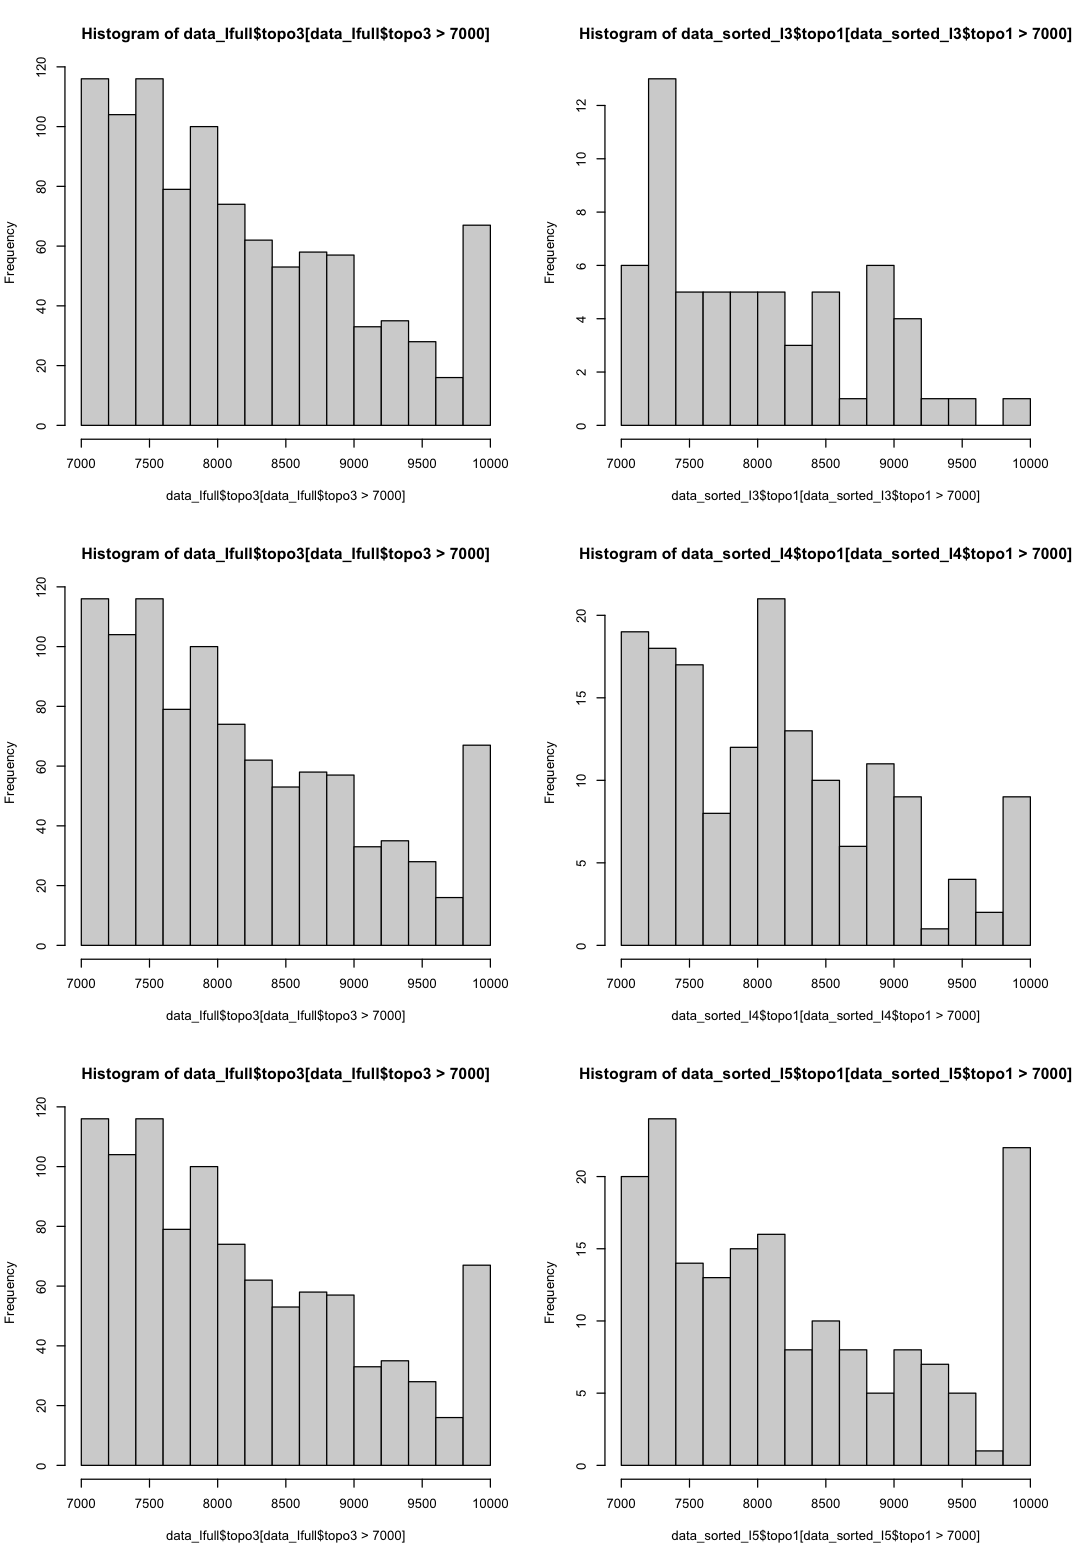

In [172]:
library(repr)
options(repr.plot.width=9, repr.plot.height=13)
par(mfrow=c(3,2))

#hist(I6_combined$topo3[I6_combined$topo3>7000], breaks=20)
#hist(I6_combined$topo1[I6_combined$topo1>7000], breaks=20)

hist(data_Ifull$topo3[data_Ifull$topo3>7000], breaks=15)
hist(data_sorted_I3$topo1[data_sorted_I3$topo1>7000], breaks=15)

hist(data_Ifull$topo3[data_Ifull$topo3>7000], breaks=15)
hist(data_sorted_I4$topo1[data_sorted_I4$topo1>7000], breaks=15)

hist(data_Ifull$topo3[data_Ifull$topo3>7000], breaks=15)
hist(data_sorted_I5$topo1[data_sorted_I5$topo1>7000], breaks=15)




In [93]:
hist.info_t1 <- hist(I6_combined$topo1[I6_combined$topo1>7000], breaks = 15, plot=FALSE)
hist.info_t3 <- hist(I6_combined$topo3[I6_combined$topo3>7000], breaks = 15, plot=FALSE)
hist.info_t2 <- hist(I6_combined$topo2[I6_combined$topo3>7000], breaks = 15, plot=FALSE)